In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_edges': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 '_errors': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. Other kwargs are included in the metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num")
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In the terminal, the `__repr__` prints out bin counts and errors.

In [4]:
print((num/den).rebin(3))

[0.986 ± 0.475   1.787 ± 0.418   1.586 ± 0.225   1.431 ± 0.146
 1.467 ± 0.118   1.547 ± 0.128   1.467 ± 0.144   1.418 ± 0.222
 1.763 ± 0.414   1.875 ± 0.710]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [5]:
num

[3.000 ± 1.732   1.000 ± 1.000   2.000 ± 1.414   10.000 ± 3.162
 6.000 ± 2.449   14.000 ± 3.742   18.000 ± 4.243   36.000 ± 6.000
 27.000 ± 5.196   40.000 ± 6.325   55.000 ± 7.416   51.000 ± 7.141
 77.000 ± 8.775   75.000 ± 8.660   81.000 ± 9.000   86.000 ± 9.274
 76.000 ± 8.718   62.000 ± 7.874   68.000 ± 8.246   46.000 ± 6.782
 47.000 ± 6.856   36.000 ± 6.000   23.000 ± 4.796   12.000 ± 3.464
 18.000 ± 4.243   12.000 ± 3.464   6.000 ± 2.449   4.000 ± 2.000
 5.000 ± 2.236   3.000 ± 1.732]

Or, just explicitly plot it with matplotlib.

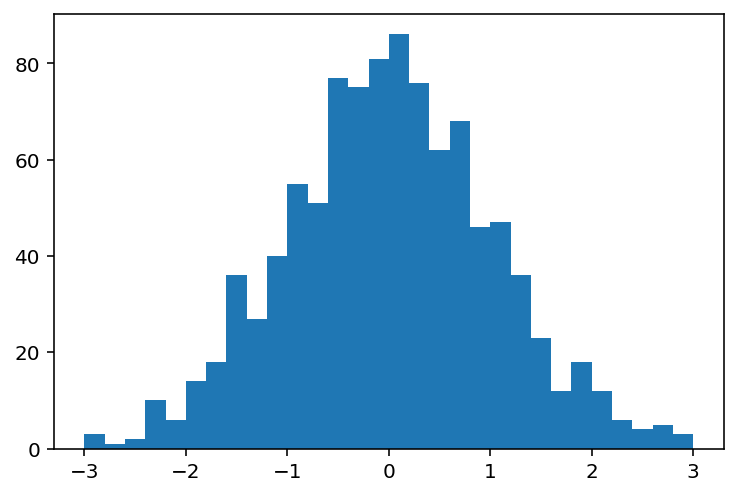

In [6]:
num.plot()

Change the style and show bin counts with some more options.

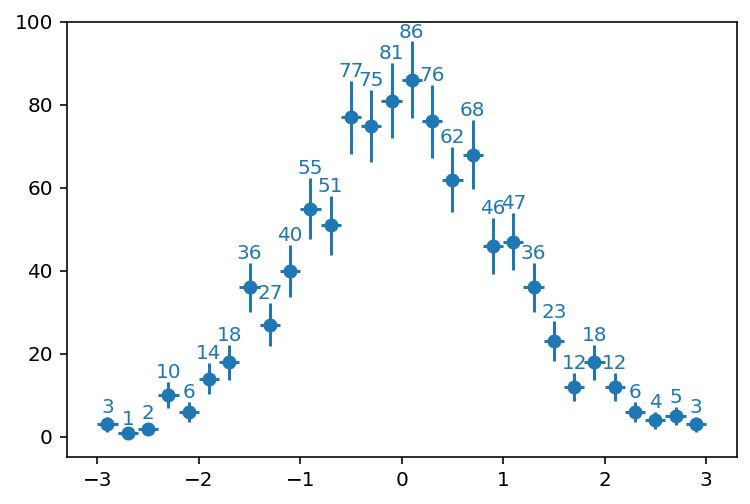

In [7]:
num.plot(show_errors=True,show_counts=True)

Do math with the histograms and merge 3 bins into one

In [8]:
2*(num/den).rebin(3)

[1.971 ± 0.950   3.573 ± 0.836   3.172 ± 0.449   2.863 ± 0.292
 2.934 ± 0.235   3.094 ± 0.256   2.935 ± 0.287   2.836 ± 0.444
 3.525 ± 0.828   3.750 ± 1.420]

Make a more complicated plot with a ratio panel.

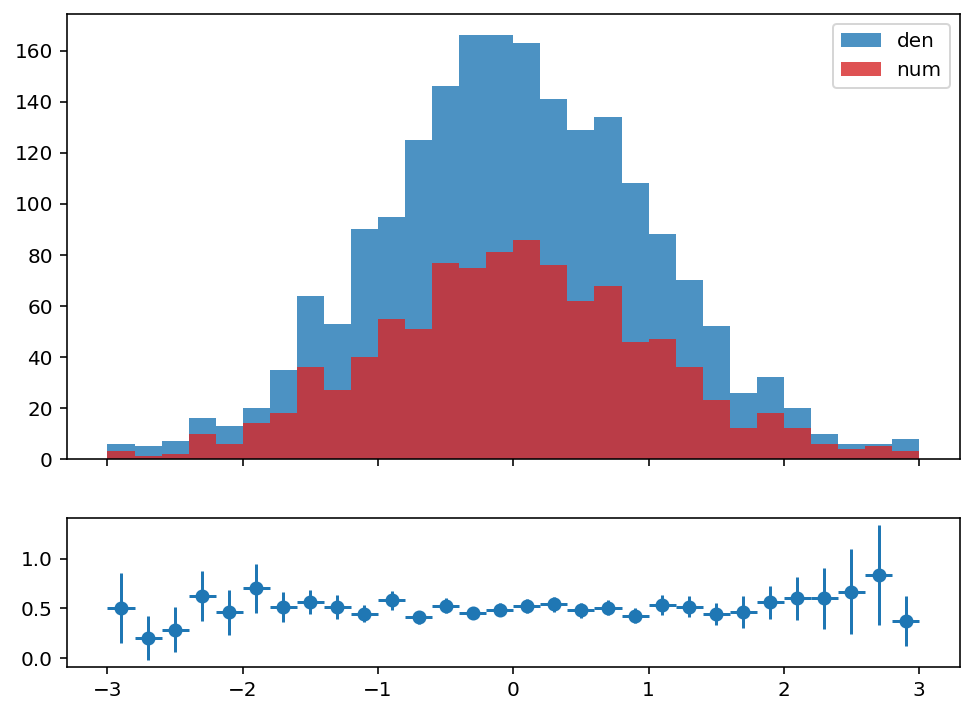

In [9]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True)
ax1.legend()

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [10]:
num.to_json()

'{"_counts": [3.0, 1.0, 2.0, 10.0, 6.0, 14.0, 18.0, 36.0, 27.0, 40.0, 55.0, 51.0, 77.0, 75.0, 81.0, 86.0, 76.0, 62.0, 68.0, 46.0, 47.0, 36.0, 23.0, 12.0, 18.0, 12.0, 6.0, 4.0, 5.0, 3.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [1.7320508075688772, 1.0, 1.4142135623730951, 3.1622776601683795, 2.449489742783178, 3.7416573867739413, 4.242640687119285, 6.0, 5.196152422706632, 6.324555320336759, 7.416198487095663, 7.14142842854285, 8.774964387392123, 8.660254037844387, 9.0, 9.273618495495704, 8.717797887081348, 7.874007874011811, 8.246211251235321, 6.782329983125268, 6.855654600401044, 6

In [11]:
Hist1D.from_json(num.to_json())

[3.000 ± 1.732   1.000 ± 1.000   2.000 ± 1.414   10.000 ± 3.162
 6.000 ± 2.449   14.000 ± 3.742   18.000 ± 4.243   36.000 ± 6.000
 27.000 ± 5.196   40.000 ± 6.325   55.000 ± 7.416   51.000 ± 7.141
 77.000 ± 8.775   75.000 ± 8.660   81.000 ± 9.000   86.000 ± 9.274
 76.000 ± 8.718   62.000 ± 7.874   68.000 ± 8.246   46.000 ± 6.782
 47.000 ± 6.856   36.000 ± 6.000   23.000 ± 4.796   12.000 ± 3.464
 18.000 ± 4.243   12.000 ± 3.464   6.000 ± 2.449   4.000 ± 2.000
 5.000 ± 2.236   3.000 ± 1.732]

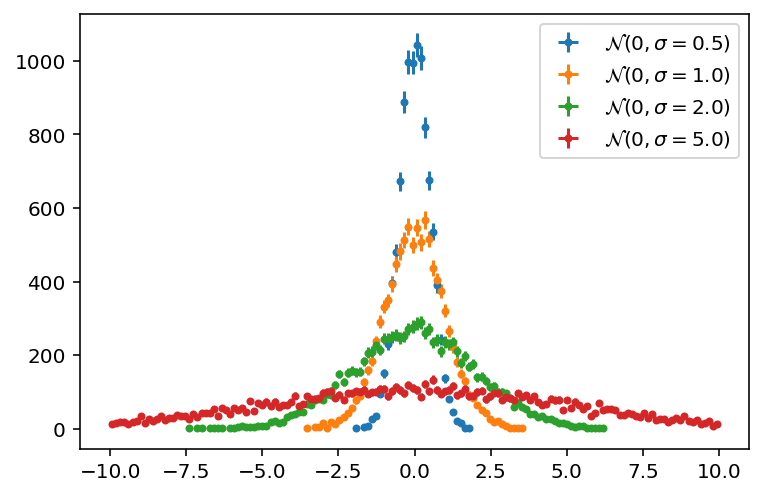

In [12]:
[
    Hist1D(
        np.random.normal(0,sigma,10000),
        bins=np.linspace(-10,10,151),
        label=r"$\mathcal{{N}}(0,\sigma={:.1f})$".format(sigma),
        overflow=False,
    ).plot(show_errors=True,markersize=3.0).legend() for sigma in [0.5,1,2,5]
];

In [13]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

h

[[0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 ...
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  1.000 ± 1.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]

In [14]:
print(str(h))

[[0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 ...
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  1.000 ± 1.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]


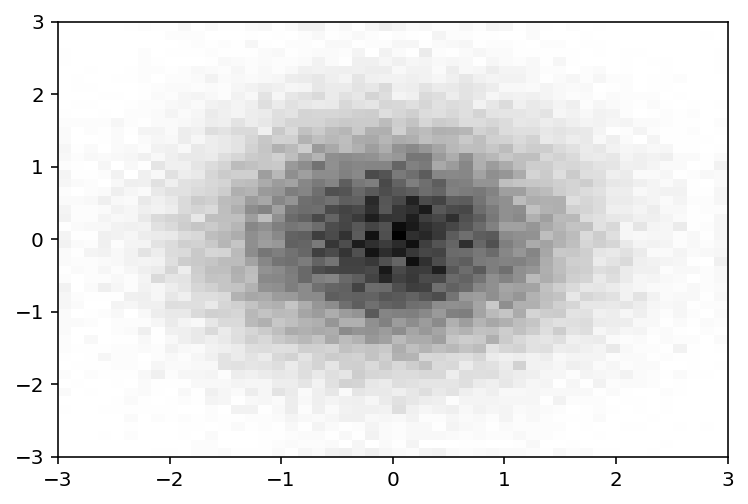

In [15]:
h.plot(cmap="binary")